In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,InputLayer,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_sample = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv') 

In [4]:
X = (df_train.iloc[:,1:].values/255)
y = df_train.iloc[:,:1]

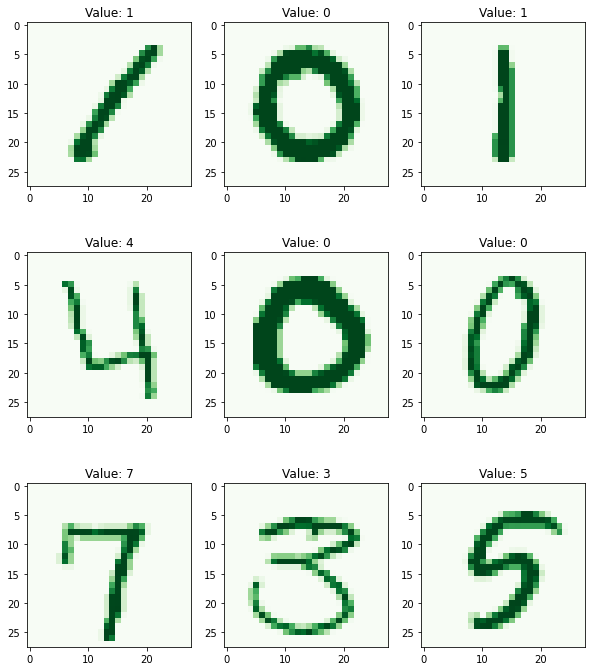

In [5]:
plt.figure(  figsize = (10,12) )
for i in range(9):
    plt.subplot(3,3,i + 1)
    plt.imshow(X.reshape(-1,28,28,1)[i],cmap = 'Greens')
    plt.title(("Value: {}".format(y.iloc[i,0])))
plt.show()

In [6]:
y = to_categorical(y, num_classes = 10)
x_train,x_valid,y_train,y_valid = train_test_split(X, y, test_size=0.33, random_state = 42) 
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_test.reshape(-1, 28, 28, 1)


NameError: name 'x_test' is not defined

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    Conv2D(32,3,activation = 'relu',padding = 'Same' ,input_shape = (28,28,1)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    BatchNormalization(),
    Conv2D(32,3,activation = 'relu',padding = 'Same' ,input_shape = (28,28,1)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    BatchNormalization(),
    Conv2D(32,3,activation = 'relu', padding = 'Same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    BatchNormalization(),
    Flatten(),
    Dense(256,activation = 'relu'),
    Dense(10, activation = "softmax")
])

In [8]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=["accuracy"])

In [9]:
early_stopping = EarlyStopping(patience=40, monitor = 'val_loss')

In [10]:
history = model.fit( x_train, y_train,validation_data=(x_valid,y_valid),  epochs = 10, callbacks = [early_stopping],batch_size = 100)


Epoch 1/10
281/282 [============================>.] - ETA: 0s - loss: 0.4415 - accuracy: 0.8707

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 784)


In [11]:
x_test = df_test.iloc[:].values/255
x_test = x_test.reshape(-1,28,28,1)

In [12]:
prediction = pd.DataFrame({'ImageId':range(1,28001),'Label': model.predict(x_test).argmax(axis=1)})
prediction


,ImageId,Label
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
27995,27996,1
27996,27997,1
27997,27998,1
27998,27999,1


In [13]:
prediction.to_csv('submit.csv',index=None)

In [14]:
df_sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
